Try to use an NN to classify patients in healthy (class 5) and non healthy (classes 1-4)

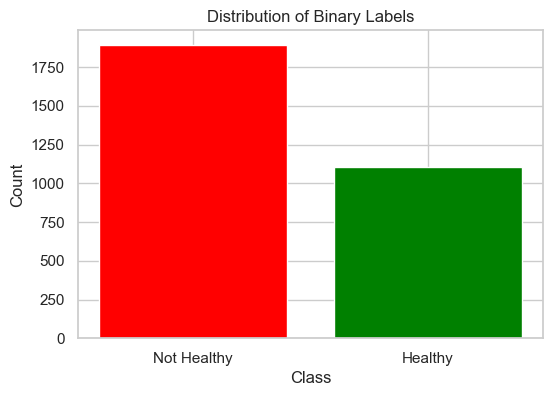

In [ ]:
import numpy as np
# Load X and y
X = np.load('X.npy')
y = np.load('y.npy')

n_cl = 2

# create new labels y for binary classification, for each row in y, if any of the first 4 columns is 1, set new label to [1, 0] (not healthy), else set to [0, 1] (healthy)
y_binary = np.zeros((y.shape[0], n_cl))
for i in range(y.shape[0]):
    if np.any(y[i, :4] == 1):
        y_binary[i, 0] = 1
    else:
        y_binary[i, 1] = 1

# Check the distribution of the new labels
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.bar([0, 1], [np.sum(y_binary[:, 0]), np.sum(y_binary[:, 1])], color=['red', 'green'])
plt.xticks([0, 1], ['Not Healthy', 'Healthy'])
plt.title('Distribution of Binary Labels')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [5]:
from sklearn.utils.class_weight import compute_class_weight

# Use all possible class indices for one-hot encoded y
class_weights = compute_class_weight('balanced', classes=np.arange(y_binary.shape[1]), y=y_binary.argmax(axis=1))

# format as a dict class: weight
class_weights = dict(enumerate(class_weights))
print(class_weights)

{0: np.float64(0.7923930269413629), 1: np.float64(1.3550135501355014)}


In [6]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y_binary, test_size=0.2, random_state=42, stratify=y_binary.argmax(axis=1))


In [7]:
import tensorflow as tf

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,    #0.05               best with 0.001
  decay_steps=50, #100        best with 100
  decay_rate=4, #1              best with 1
  staircase=True)

def get_optimizer():
    return tf.keras.optimizers.Adam(lr_schedule)

def get_callbacks(name):
    return [
        tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=200, min_delta=0.001),
        ]

def compile_and_fit(model, name, x_train, y_train, x_test, y_test, optimizer=None, max_epochs=100):

    if optimizer is None:
        optimizer = get_optimizer()

    model.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy'])

    model.summary()

    history = model.fit(
            x_train, y_train,
            epochs=max_epochs,
            # batch_size=500,
            validation_data=(x_test, y_test),
            callbacks=get_callbacks(name),
            class_weight=class_weights,
            verbose=2)

    return history

c:\Users\adriano.minora\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       102,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 275,522 (1.05 MB)

 Trainable params: 275,522 (1.05 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
75/75 - 2s - 29ms/step - accuracy: 0.6629 - loss: 1.3861 - val_accuracy: 0.7617 - val_loss: 1.2309
Epoch 2/1000
75/75 - 0s - 4ms/step - accuracy: 0.8142 - loss: 1.1304 - val_accuracy: 0.8200 - val_loss: 1.1104
Epoch 3/1000
75/75 - 0s - 4ms/step - accuracy: 0.8700 - loss: 1.0304 - val_accuracy: 0.8333 - val_loss: 1.0643
Epoch 4/1000
75/75 - 0s - 4ms/step - accuracy: 0.8842 - loss: 0.9778 - val_accuracy: 0.8550 - val_loss: 1.0233
Epoch 5/1000
75/75 - 0s - 4ms/step - accuracy: 0.9008 - loss: 0.9393 - val_accuracy: 0.8783 - val_loss: 0.9928
Epoch 6/1000
75/75 - 0s - 4ms/step - accuracy: 0.9137 - loss: 0.9093 - val_accuracy: 0.8783 - val_loss: 0.9748
Epoch 7/1000
75/75 - 0s - 5ms/step - accuracy: 0.9183 - loss: 0.8868 - val_accuracy: 0.8883 - val_loss: 0.9527
Epoch 8/1000
75/75 - 0s - 4ms/step - accuracy: 0.9321 - loss: 0.8667 - val_accuracy: 0.8850 - val_loss: 0.9494
Epoch 9/1000
75/75 - 0s - 4ms/step - accuracy: 0.9362 - loss: 0.8531 - val_accuracy: 0.8883 - val_loss: 0.9298


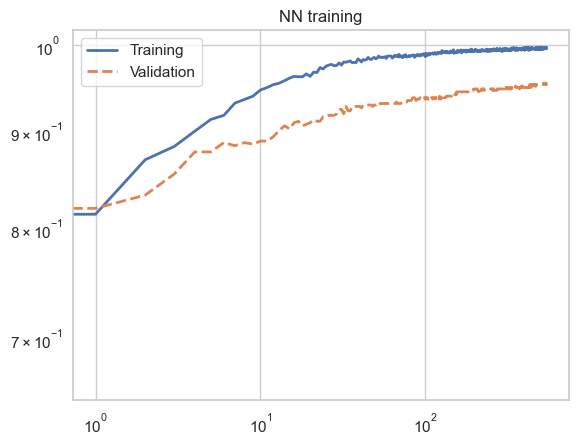

In [8]:
from tensorflow.keras import layers, regularizers

INPUTDIM = X_train.shape[1]
OUTPUTDIM = y_train.shape[1]

n_train=X_train.shape[0]
n_val=X_val.shape[0]

dropout= 0.01
reg = 0.001

NN = tf.keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(INPUTDIM,),kernel_regularizer = regularizers.l2(reg)),
    layers.Dropout(dropout),
    layers.Dense(256, activation='relu', kernel_regularizer = regularizers.l2(reg)),
    layers.Dropout(dropout),
    layers.Dense(128, activation='relu', kernel_regularizer = regularizers.l2(reg)),
    layers.Dropout(dropout),
    layers.Dense(64, activation='relu', kernel_regularizer = regularizers.l2(reg)),
    layers.Dropout(dropout),
    layers.Dense(OUTPUTDIM, activation='softmax')
])

history = compile_and_fit(NN, 'NN',X_train, y_train, X_val, y_val, max_epochs=1000)

bc     = history.history['accuracy']
val_bc = history.history['val_accuracy']

plt.loglog(range(np.shape(bc)[0]),bc, linewidth=2,)
plt.loglog(range(np.shape(val_bc)[0]),val_bc,'--', linewidth=2,)
plt.title('NN training')
plt.grid(True)
#plt.show(block=False)

plt.legend(('Training','Validation'))
plt.show()



Epoch 544/1000
75/75 - 1s - 8ms/step - accuracy: 0.9975 - loss: 0.5493 - val_accuracy: 0.9550 - val_loss: 0.6910

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
F1 score: 0.9882046795491424


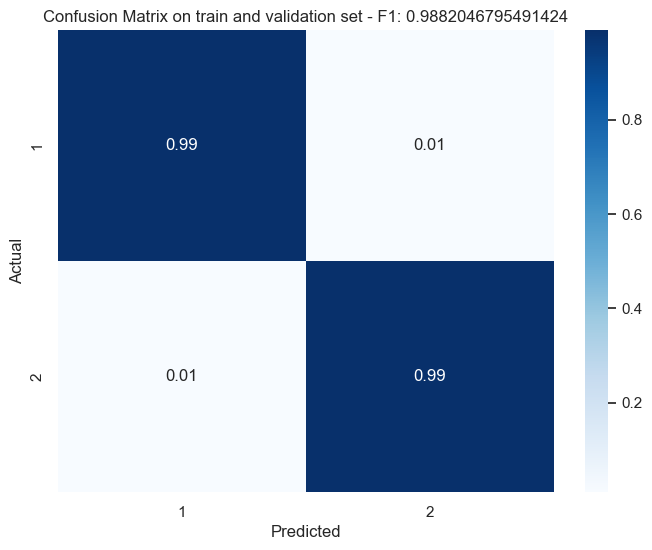

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns

# Example true labels and predicted labels
y_true = np.argmax(np.concatenate((y_val, y_train)), axis=-1)
y_pred = np.argmax(NN.predict(np.concatenate((X_val, X_train))), axis=-1)

# Compute the f1 score
f1 = f1_score(y_true, y_pred, average='macro')
print('F1 score:', f1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=range(n_cl), normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=range(1,n_cl+1), yticklabels=range(1,n_cl+1))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix on train and validation set - F1: {f1}')
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
F1 score: 0.9517821266463278


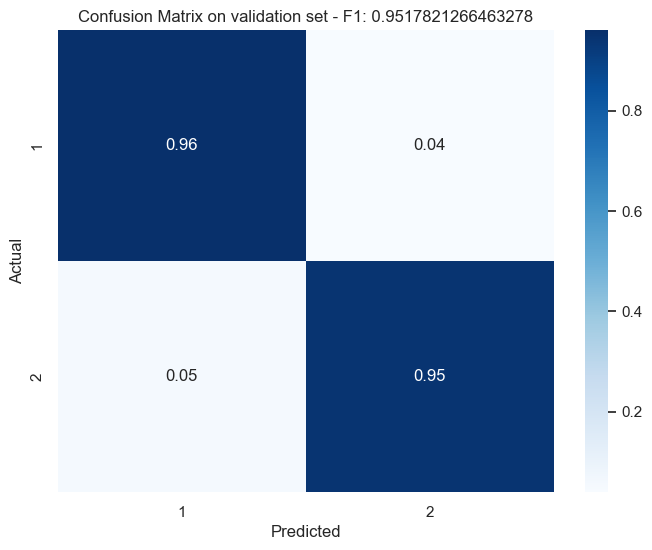

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns

# Example true labels and predicted labels
y_true = np.argmax(y_val, axis=-1)
y_pred = np.argmax(NN.predict(X_val), axis=-1)

# Compute the f1 score
f1 = f1_score(y_true, y_pred, average='macro')
print('F1 score:', f1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=range(n_cl), normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=range(1,n_cl+1), yticklabels=range(1,n_cl+1))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix on validation set - F1: {f1}')
plt.show()

In [ ]:
# Save the NN

save = False
if save:
    NN.save('NN_rhythm_binary.keras')
    print("Model saved.")
else:
    print("Model not saved.")

Model saved.


Now try for Male and Female separately

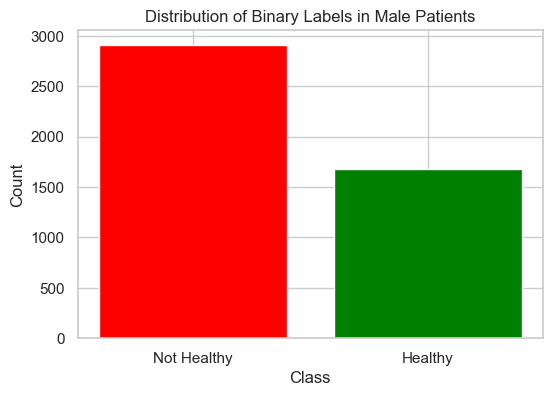

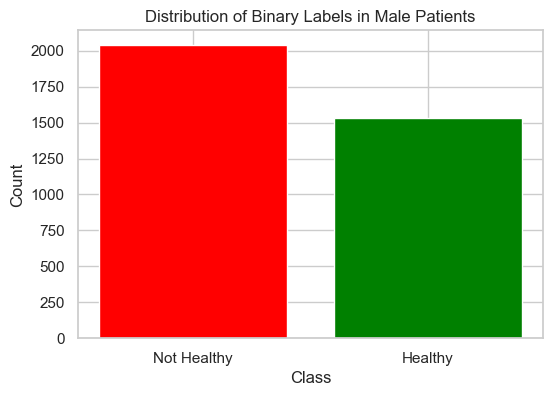

In [45]:
import numpy as np
# Load X and y
X_m = np.load('XM_rhythm.npy')
X_f = np.load('XF_rhythm.npy')
y_m = np.load('yM_rhythm.npy')
y_f = np.load('yF_rhythm.npy')

n_cl = 2

# create new labels y for binary classification, for each row in y, if any of the first 4 columns is 1, set new label to [1, 0] (not healthy), else set to [0, 1] (healthy)
y_binary_m = np.zeros((y_m.shape[0], n_cl))
y_binary_f = np.zeros((y_f.shape[0], n_cl))

for i in range(y_m.shape[0]):
    if np.any(y_m[i, :4] == 1):
        y_binary_m[i, 0] = 1
    else:
        y_binary_m[i, 1] = 1

for i in range(y_f.shape[0]):
    if np.any(y_f[i, :4] == 1):
        y_binary_f[i, 0] = 1
    else:
        y_binary_f[i, 1] = 1

# Check the distribution of the new labels
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.bar([0, 1], [np.sum(y_binary_m[:, 0]), np.sum(y_binary_m[:, 1])], color=['red', 'green'])
plt.xticks([0, 1], ['Not Healthy', 'Healthy'])
plt.title('Distribution of Binary Labels in Male Patients')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Check the distribution of the new labels
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.bar([0, 1], [np.sum(y_binary_f[:, 0]), np.sum(y_binary_f[:, 1])], color=['red', 'green'])
plt.xticks([0, 1], ['Not Healthy', 'Healthy'])
plt.title('Distribution of Binary Labels in Male Patients')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [46]:
from sklearn.utils.class_weight import compute_class_weight

# Use all possible class indices for one-hot encoded y
class_weights_m = compute_class_weight('balanced', classes=np.arange(y_binary_m.shape[1]), y=y_binary_m.argmax(axis=1))
class_weights_f = compute_class_weight('balanced', classes=np.arange(y_binary_f.shape[1]), y=y_binary_f.argmax(axis=1))

# format as a dict class: weight
class_weights_m = dict(enumerate(class_weights_m))
class_weights_f = dict(enumerate(class_weights_f))

print(class_weights_m)
print(class_weights_f)

{0: np.float64(0.788659793814433), 1: np.float64(1.3660714285714286)}
{0: np.float64(0.875), 1: np.float64(1.1666666666666667)}


In [47]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train_m, X_val_m, y_train_m, y_val_m = train_test_split(X_m, y_binary_m, test_size=0.2, random_state=42, stratify=y_binary_m.argmax(axis=1))
X_train_f, X_val_f, y_train_f, y_val_f = train_test_split(X_f, y_binary_f, test_size=0.2, random_state=42, stratify=y_binary_f.argmax(axis=1))



Male

In [ ]:
import tensorflow as tf

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,    #0.05               best with 0.001
  decay_steps=50, #100        best with 100
  decay_rate=5, #1              best with 1
  staircase=True)

def get_optimizer():
    return tf.keras.optimizers.Adam(lr_schedule)

def get_callbacks(name):
    return [
        tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=200, min_delta=0.001),
        ]

def compile_and_fit(model, name, x_train, y_train, x_test, y_test, optimizer=None, max_epochs=100):

    if optimizer is None:
        optimizer = get_optimizer()

    model.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy'])

    model.summary()

    history = model.fit(
            x_train, y_train,
            epochs=max_epochs,
            # batch_size=500,
            validation_data=(x_test, y_test),
            callbacks=get_callbacks(name),
            class_weight=class_weights_m,
            verbose=2)

    return history

c:\Users\adriano.minora\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_53 (Dense)                │ (None, 512)            │       102,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 316,610 (1.21 MB)

 Trainable params: 316,610 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2000
115/115 - 9s - 79ms/step - accuracy: 0.7367 - loss: 1.6165 - val_accuracy: 0.8475 - val_loss: 1.3157
Epoch 2/2000
115/115 - 2s - 15ms/step - accuracy: 0.8815 - loss: 1.2227 - val_accuracy: 0.8813 - val_loss: 1.1827
Epoch 3/2000
115/115 - 3s - 23ms/step - accuracy: 0.9129 - loss: 1.1142 - val_accuracy: 0.9096 - val_loss: 1.1141
Epoch 4/2000
115/115 - 2s - 16ms/step - accuracy: 0.9286 - loss: 1.0525 - val_accuracy: 0.9216 - val_loss: 1.0661
Epoch 5/2000
115/115 - 2s - 14ms/step - accuracy: 0.9395 - loss: 1.0132 - val_accuracy: 0.9237 - val_loss: 1.0391
Epoch 6/2000
115/115 - 2s - 19ms/step - accuracy: 0.9477 - loss: 0.9841 - val_accuracy: 0.9281 - val_loss: 1.0175
Epoch 7/2000
115/115 - 3s - 27ms/step - accuracy: 0.9526 - loss: 0.9601 - val_accuracy: 0.9368 - val_loss: 0.9965
Epoch 8/2000
115/115 - 4s - 34ms/step - accuracy: 0.9532 - loss: 0.9421 - val_accuracy: 0.9390 - val_loss: 0.9808
Epoch 9/2000
115/115 - 1s - 13ms/step - accuracy: 0.9548 - loss: 0.9271 - val_accuracy: 

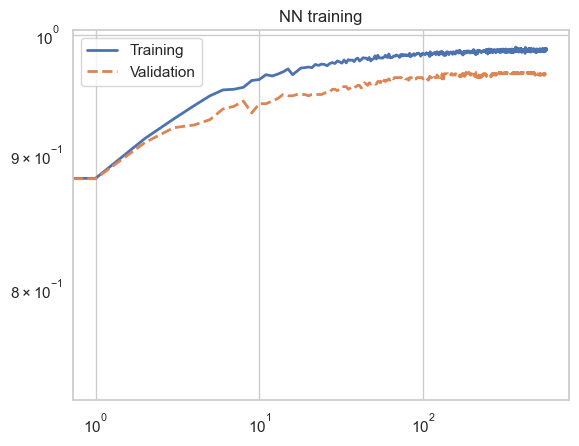

In [53]:
from tensorflow.keras import layers, regularizers

INPUTDIM = X_train_m.shape[1]
OUTPUTDIM = y_train_m.shape[1]

n_train_m=X_train_m.shape[0]
n_val_m=X_val_m.shape[0]

dropout= 0.015
reg = 0.0015

NN = tf.keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(INPUTDIM,),kernel_regularizer = regularizers.l2(reg)),
    layers.Dropout(dropout),
    layers.Dense(256, activation='relu', kernel_regularizer = regularizers.l2(reg)),
    layers.Dropout(dropout),
    layers.Dense(256, activation='relu', kernel_regularizer = regularizers.l2(reg)),
    layers.Dropout(dropout),
    layers.Dense(64, activation='relu', kernel_regularizer = regularizers.l2(reg)),
    layers.Dropout(dropout),
    layers.Dense(OUTPUTDIM, activation='softmax')
])

history = compile_and_fit(NN, 'NN',X_train_m, y_train_m, X_val_m, y_val_m, max_epochs=2000)

bc     = history.history['accuracy']
val_bc = history.history['val_accuracy']

plt.loglog(range(np.shape(bc)[0]),bc, linewidth=2,)
plt.loglog(range(np.shape(val_bc)[0]),val_bc,'--', linewidth=2,)
plt.title('NN training')
plt.grid(True)
#plt.show(block=False)

plt.legend(('Training','Validation'))
plt.show()



Epoch 570/2000
115/115 - 2s - 13ms/step - accuracy: 0.9872 - loss: 0.6170 - val_accuracy: 0.9662 - val_loss: 0.6766

144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
F1 score: 0.9820835766941456


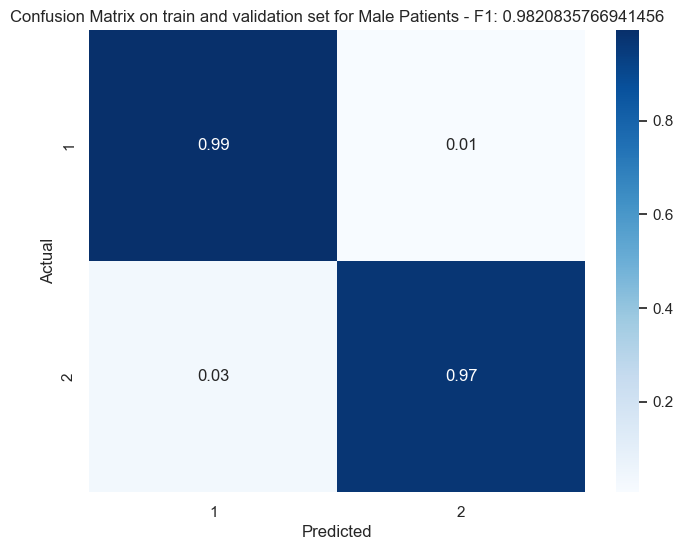

In [54]:
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns

# Example true labels and predicted labels
y_true = np.argmax(np.concatenate((y_val_m, y_train_m)), axis=-1)
y_pred = np.argmax(NN.predict(np.concatenate((X_val_m, X_train_m))), axis=-1)

# Compute the f1 score
f1 = f1_score(y_true, y_pred, average='macro')
print('F1 score:', f1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=range(n_cl), normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=range(1,n_cl+1), yticklabels=range(1,n_cl+1))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix on train and validation set for Male Patients - F1: {f1}')
plt.show()

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
F1 score: 0.9632611802432989


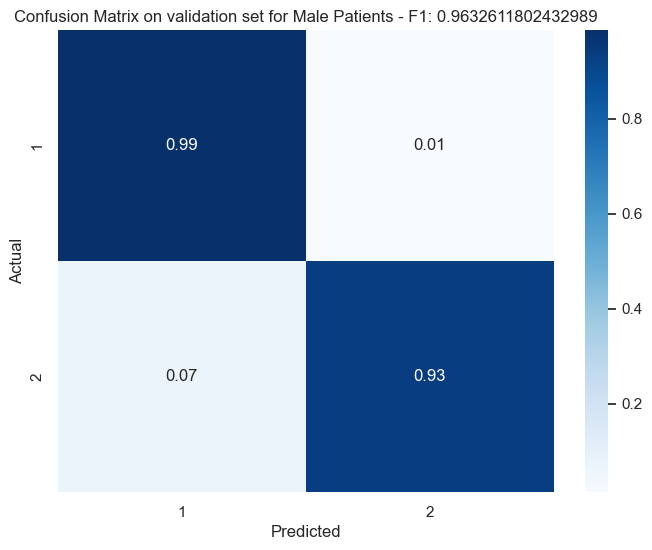

In [55]:
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns

# Example true labels and predicted labels
y_true = np.argmax(y_val_m, axis=-1)
y_pred = np.argmax(NN.predict(X_val_m), axis=-1)

# Compute the f1 score
f1 = f1_score(y_true, y_pred, average='macro')
print('F1 score:', f1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=range(n_cl), normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=range(1,n_cl+1), yticklabels=range(1,n_cl+1))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix on validation set for Male Patients - F1: {f1}')
plt.show()

In [ ]:
# Save the NN

save = False
if save:
    NN.save('NN_rhythm_binary_M.keras')
    print("Model saved.")
else:
    print("Model not saved.")

Model saved.


Female

In [57]:
import tensorflow as tf

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,    #0.05               best with 0.001
  decay_steps=50, #100        best with 100
  decay_rate=4, #1              best with 1
  staircase=True)

def get_optimizer():
    return tf.keras.optimizers.Adam(lr_schedule)

def get_callbacks(name):
    return [
        tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=200, min_delta=0.001),
        ]

def compile_and_fit(model, name, x_train, y_train, x_test, y_test, optimizer=None, max_epochs=100):

    if optimizer is None:
        optimizer = get_optimizer()

    model.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy'])

    model.summary()

    history = model.fit(
            x_train, y_train,
            epochs=max_epochs,
            # batch_size=500,
            validation_data=(x_test, y_test),
            callbacks=get_callbacks(name),
            class_weight=class_weights_f,
            verbose=2)

    return history

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                │ (None, 512)            │       102,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 316,610 (1.21 MB)

 Trainable params: 316,610 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
90/90 - 16s - 176ms/step - accuracy: 0.7738 - loss: 1.9483 - val_accuracy: 0.8725 - val_loss: 1.5776
Epoch 2/1000
90/90 - 2s - 18ms/step - accuracy: 0.9083 - loss: 1.4594 - val_accuracy: 0.8978 - val_loss: 1.4195
Epoch 3/1000
90/90 - 2s - 24ms/step - accuracy: 0.9349 - loss: 1.3518 - val_accuracy: 0.9202 - val_loss: 1.3598
Epoch 4/1000
90/90 - 2s - 27ms/step - accuracy: 0.9475 - loss: 1.2829 - val_accuracy: 0.9384 - val_loss: 1.2949
Epoch 5/1000
90/90 - 2s - 27ms/step - accuracy: 0.9559 - loss: 1.2375 - val_accuracy: 0.9356 - val_loss: 1.2561
Epoch 6/1000
90/90 - 2s - 22ms/step - accuracy: 0.9618 - loss: 1.2045 - val_accuracy: 0.9454 - val_loss: 1.2293
Epoch 7/1000
90/90 - 2s - 22ms/step - accuracy: 0.9618 - loss: 1.1813 - val_accuracy: 0.9454 - val_loss: 1.2046
Epoch 8/1000
90/90 - 2s - 22ms/step - accuracy: 0.9667 - loss: 1.1578 - val_accuracy: 0.9482 - val_loss: 1.1842
Epoch 9/1000
90/90 - 2s - 23ms/step - accuracy: 0.9667 - loss: 1.1398 - val_accuracy: 0.9496 - val_los

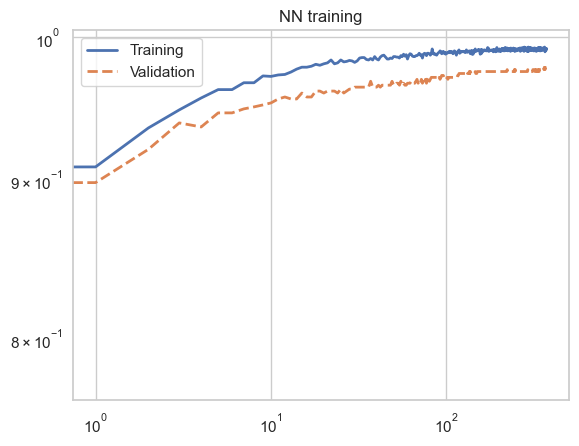

In [59]:
from tensorflow.keras import layers, regularizers

INPUTDIM = X_train_f.shape[1]
OUTPUTDIM = y_train_f.shape[1]

n_train_f=X_train_f.shape[0]
n_val_f=X_val_f.shape[0]

dropout= 0.02
reg = 0.002

NN = tf.keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(INPUTDIM,),kernel_regularizer = regularizers.l2(reg)),
    layers.Dropout(dropout),
    layers.Dense(256, activation='relu', kernel_regularizer = regularizers.l2(reg)),
    layers.Dropout(dropout),
    layers.Dense(256, activation='relu', kernel_regularizer = regularizers.l2(reg)),
    layers.Dropout(dropout),
    layers.Dense(64, activation='relu', kernel_regularizer = regularizers.l2(reg)),
    layers.Dropout(dropout),
    layers.Dense(OUTPUTDIM, activation='softmax')
])

history = compile_and_fit(NN, 'NN',X_train_f, y_train_f, X_val_f, y_val_f, max_epochs=1000)

bc     = history.history['accuracy']
val_bc = history.history['val_accuracy']

plt.loglog(range(np.shape(bc)[0]),bc, linewidth=2,)
plt.loglog(range(np.shape(val_bc)[0]),val_bc,'--', linewidth=2,)
plt.title('NN training')
plt.grid(True)
#plt.show(block=False)

plt.legend(('Training','Validation'))
plt.show()



Epoch 373/1000
90/90 - 2s - 19ms/step - accuracy: 0.9916 - loss: 0.7196 - val_accuracy: 0.9776 - val_loss: 0.7483

112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
F1 score: 0.9888397607510184


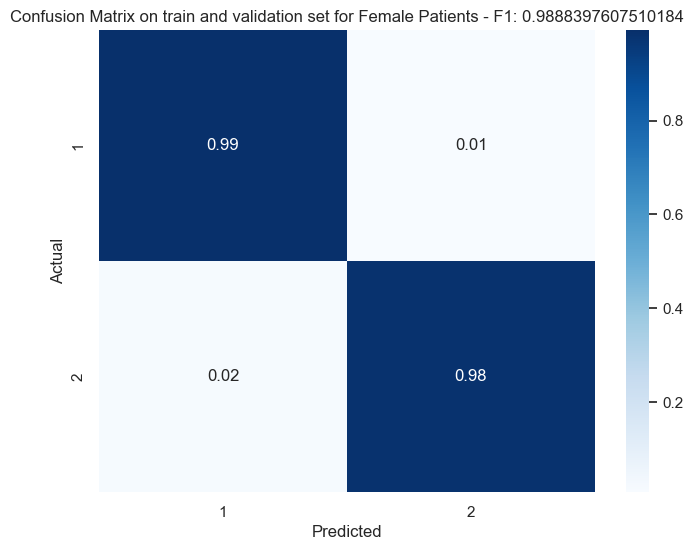

In [60]:
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns

# Example true labels and predicted labels
y_true = np.argmax(np.concatenate((y_val_f, y_train_f)), axis=-1)
y_pred = np.argmax(NN.predict(np.concatenate((X_val_f, X_train_f))), axis=-1)

# Compute the f1 score
f1 = f1_score(y_true, y_pred, average='macro')
print('F1 score:', f1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=range(n_cl), normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=range(1,n_cl+1), yticklabels=range(1,n_cl+1))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix on train and validation set for Female Patients - F1: {f1}')
plt.show()

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
F1 score: 0.9771784729713533


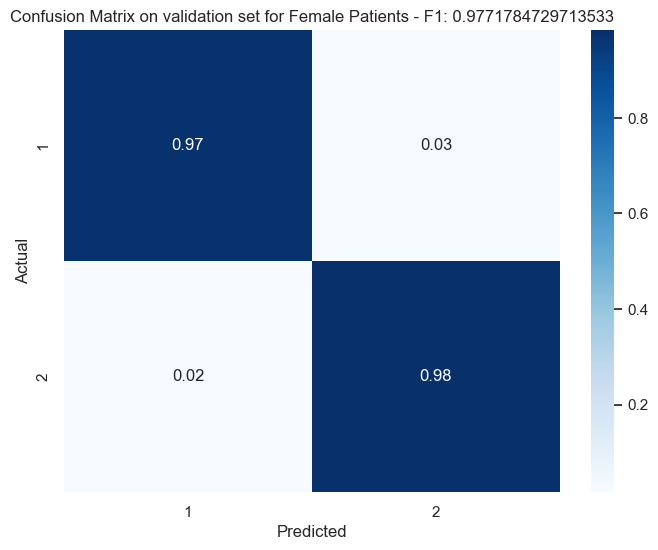

In [61]:
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns

# Example true labels and predicted labels
y_true = np.argmax(y_val_f, axis=-1)
y_pred = np.argmax(NN.predict(X_val_f), axis=-1)

# Compute the f1 score
f1 = f1_score(y_true, y_pred, average='macro')
print('F1 score:', f1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=range(n_cl), normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=range(1,n_cl+1), yticklabels=range(1,n_cl+1))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix on validation set for Female Patients - F1: {f1}')
plt.show()

In [63]:
# Save the NN

save = False
if save:
    NN.save('NN_rhythm_binary_F.keras')
    print("Model saved.")
else:
    print("Model not saved.")

Model not saved.
